# Integration of Geomappy into Rioxarray

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pyproj
import rioxarray as rxr

import os

import geomappy as mp
import geomappy.plot_utils

In [2]:
os.chdir("../../../")

A 2D raster of water table depth (Fan et al., 2017).

In [3]:
wtd = rxr.open_rasterio("data/wtd.tif", masked=True)

Monthly mean discharges from 2019 from GloFAS

In [4]:
proj_to_3035 = pyproj.Transformer.from_crs('EPSG:4326', 'EPSG:3035', always_xy=True)

r2 = rxr.open_rasterio(
    'data/dis_2019_monthlymeans_cropped_complete.nc',
    mask_and_scale=True,
    decode_times=False,
    parse_coordinates=True,
)

x, y = proj_to_3035.transform(r2.longitude.values[0], r2.latitude.values[0])

dis = r2.dis24[0].assign_coords(x=x[0, :], y=y[:, 0])
dis = dis.rio.set_spatial_dims(x_dim='x', y_dim='y')
dis = dis.rio.write_crs('EPSG:3035')

## Outline on a world map

The first file covers Australia, while the second file covers Europe. Both have different projections. Geomappy allows for easy inspection:

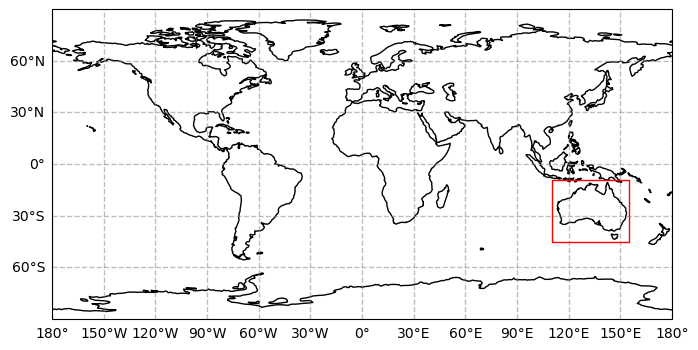

In [5]:
wtd.plot_world()
plt.show()

/usr/local/Caskroom/mambaforge/base/envs/geomappy/lib/python3.12/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)


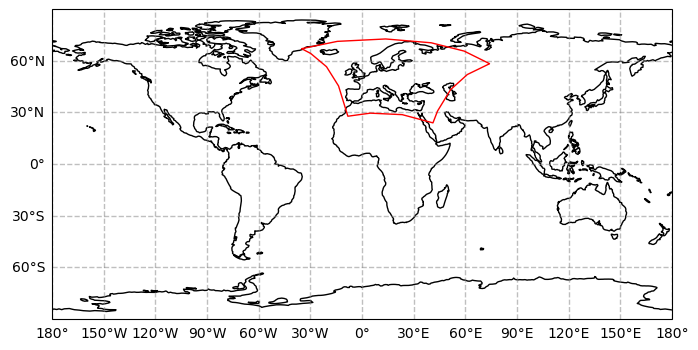

In [6]:
dis.plot_world()
plt.show()

Here you can see that different data projections cause different shapes.

## Plotting the data

The geomappy plotting functionality (``plot_raster``) is directly integrated into rioxarray by loading geomappy. This results in the same figure as seen before:

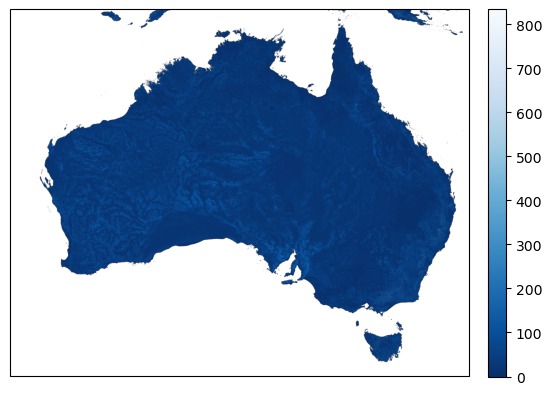

In [7]:
wtd.plot_raster(cmap="Blues_r")
plt.show()

Including legends, bins and a cmap:

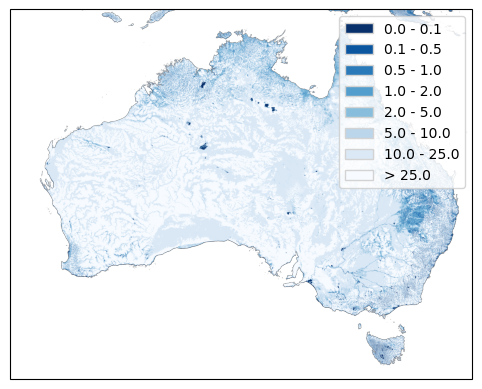

In [8]:
wtd.plot_raster(bins=[0, 0.1, 0.5, 1, 2, 5, 10, 25], legend="legend", cmap="Blues_r")
plt.show()

Plotting the same image on a basemap from within the DataArray is much easier though, by taking advantage of the internal projection representation.

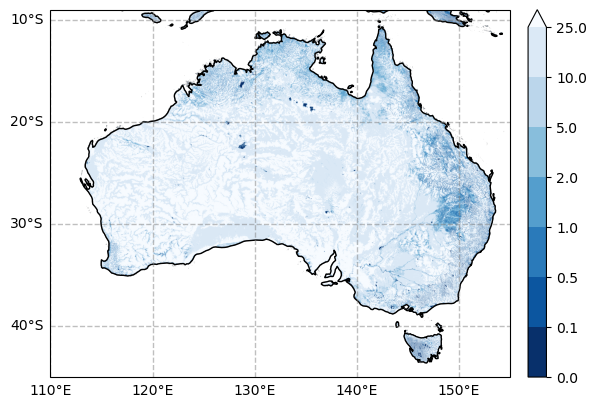

In [9]:
f, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
wtd.plot_raster(bins=[0, 0.1, 0.5, 1, 2, 5, 10, 25], cmap="Blues_r", ax=ax)
mp.add_gridlines(ax, 10)
mp.add_ticks(ax, 10)
ax.coastlines()
plt.show()